<a href="https://colab.research.google.com/github/karenbochatay/Data_Science_I/blob/main/Proyecto_Data_Science1_Satisfacci%C3%B3nAereolineas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SATISFACCIÓN DE LOS PASAJEROS DE AEROLÍNEAS**

*Introducción:*

El transporte aéreo constituye un componente fundamental de la economía global, facilitando la conectividad entre regiones, impulsando el turismo y dinamizando el comercio internacional.

En este contexto, la satisfacción de los pasajeros se presenta como un factor clave para el éxito de las aerolíneas, ya que influye directamente en la lealtad del cliente, la reputación de la marca y la rentabilidad del negocio.

Este estudio se enfoca en analizar la experiencia de los pasajeros en vuelos comerciales, utilizando un conjunto de datos basado en encuestas de satisfacción.

El objetivo principal es identificar los factores que tienen mayor impacto en la percepción del servicio y evaluar si es posible predecir el nivel de satisfacción de los pasajeros a partir de variables específicas.

Las variables incluidas en el análisis abarcan tanto características demográficas como aspectos operativos y de servicio:

- Género: Femenino / Masculino

- Tipo de Cliente: Leal / Desleal

- Edad: Edad del pasajero

- Tipo de Viaje: Personal / Negocios

- Clase de Servicio: Business / Económica / Económica Plus

- Distancia del Vuelo

- Satisfacción con Servicios Específicos: Wifi a bordo, Horarios de salida/llegada Reserva online, Ubicación de la puerta de embarque, Comida y bebida, Embarque online, Comodidad del asiento, Entretenimiento a bordo, Servicio a bordo Espacio para las piernas, Manejo de equipaje, Check-in Limpieza.

- Retrasos: Minutos de retraso en la salida y Minutos de retraso en la llegada

- Nivel de Satisfacción General: Satisfecho / Neutral / Insatisfecho

*Carga* de datos:


In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [2]:
# Configuraciones opcionales para mejor visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias (útil para presentaciones)

In [3]:
import requests

url = "https://github.com/karenbochatay/Data_Science_I/raw/refs/heads/main/Dataset%20Proyecto%20Coderhouse%20Satisfacci%C3%B3n%20Clientes%20en%20Aerolineas.csv"
response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado
response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado

id_Encuesta;Identificación;Género;Tipo de Cliente;Edad;Tipo de Viaje;Clase;Distancia de Vuelo;Servicio de wifi a bordo;Hora de salida/llegada conveniente;Facilidad de reserva en línea;Ubicación de la puerta;Comida y bebida;Embarque en línea;Comodidad del asiento;Entretenimiento a bordo;Servicio a bo
id_Encuesta;Identificación;Género;Tipo de Cliente;Edad;Tipo de Viaje;Clase;Distancia de Vuelo;Servicio de wifi a bordo;Hora de salida/llegada conveniente;Facilidad de reserva en línea;Ubicación de la puerta;Comida y bebida;Embarque en línea;Comodidad del asiento;Entretenimiento a bordo;Servicio a bo


**Análisis** exploratorio

In [4]:
df = pd.read_csv(url, sep=';', encoding='latin1') # lee el archivo,

df.head()# Muestra las primeras 5 filas

,id_Encuesta,Identificación,Género,Tipo de Cliente,Edad,Tipo de Viaje,Clase,Distancia de Vuelo,Servicio de wifi a bordo,Hora de salida/llegada conveniente,...,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Manejo de equipaje,Servicio de facturación,Servicio a bordo.1,Limpieza,Retraso en la salida en minutos,Retraso en la llegada en minutos,Satisfacción
0,0,19556,Femenino,Leal Cliente,52,Negocios Viaje,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfecho/a
1,1,90035,Femenino,Leal Cliente,36,Negocios Viaje,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfecho/a
2,2,12360,Masculino,Desleal Cliente,20,Negocios Viaje,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral o insatisfecho/a
3,3,77959,Masculino,Leal Cliente,44,Negocios Viaje,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfecho/a
4,4,36875,Femenino,Leal Cliente,49,Negocios Viaje,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfecho/a


In [5]:
df.describe()  # Estadísticas básicas de columnas numéricas

,id_Encuesta,Identificación,Edad,Distancia de Vuelo,Servicio de wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Comida y bebida,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Manejo de equipaje,Servicio de facturación,Servicio a bordo.1,Limpieza,Retraso en la salida en minutos,Retraso en la llegada en minutos
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [6]:
df.info()      # muestra tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_Encuesta                           25976 non-null  int64  
 1   Identificación                        25976 non-null  int64  
 2   Género                                25976 non-null  object 
 3   Tipo de Cliente                       25976 non-null  object 
 4   Edad                                  25976 non-null  int64  
 5   Tipo de Viaje                         25976 non-null  object 
 6   Clase                                 25976 non-null  object 
 7   Distancia de Vuelo                    25976 non-null  int64  
 8   Servicio de wifi a bordo              25976 non-null  int64  
 9   Hora de salida/llegada conveniente    25976 non-null  int64  
 10  Facilidad de reserva en línea         25976 non-null  int64  
 11  Ubicación de la

In [7]:
df.isnull().sum()  # Cuenta valores faltantes por columna

,0
id_Encuesta,0
Identificación,0
Género,0
Tipo de Cliente,0
Edad,0
Tipo de Viaje,0
Clase,0
Distancia de Vuelo,0
Servicio de wifi a bordo,0
Hora de salida/llegada conveniente,0


In [8]:
df["Retraso en la llegada en minutos"].fillna("No", inplace=True)##rellena los vacios con "No_encontrado"

In [9]:
df.isnull().sum()  # Cuenta valores faltantes por columna

,0
id_Encuesta,0
Identificación,0
Género,0
Tipo de Cliente,0
Edad,0
Tipo de Viaje,0
Clase,0
Distancia de Vuelo,0
Servicio de wifi a bordo,0
Hora de salida/llegada conveniente,0


In [10]:
df.info()      # muestra tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id_Encuesta                           25976 non-null  int64 
 1   Identificación                        25976 non-null  int64 
 2   Género                                25976 non-null  object
 3   Tipo de Cliente                       25976 non-null  object
 4   Edad                                  25976 non-null  int64 
 5   Tipo de Viaje                         25976 non-null  object
 6   Clase                                 25976 non-null  object
 7   Distancia de Vuelo                    25976 non-null  int64 
 8   Servicio de wifi a bordo              25976 non-null  int64 
 9   Hora de salida/llegada conveniente    25976 non-null  int64 
 10  Facilidad de reserva en línea         25976 non-null  int64 
 11  Ubicación de la puerta      

In [11]:
df['Retraso en la llegada en minutos'].unique()


array([44.0, 0.0, 6.0, 20.0, 65.0, 14.0, 19.0, 7.0, 113.0, 2.0, 49.0,
       13.0, 68.0, 1.0, 70.0, 12.0, 10.0, 4.0, 177.0, 3.0, 55.0, 90.0,
       32.0, 46.0, 57.0, 47.0, 40.0, 24.0, 27.0, 52.0, 17.0, 11.0, 34.0,
       95.0, 66.0, 8.0, 86.0, 88.0, 178.0, 78.0, 18.0, 72.0, 41.0, 91.0,
       35.0, 16.0, 25.0, 77.0, 94.0, 163.0, 102.0, 42.0, 15.0, 9.0, 85.0,
       23.0, 28.0, 30.0, 71.0, 5.0, 79.0, 251.0, 151.0, 38.0, 62.0, 21.0,
       29.0, 93.0, 232.0, 156.0, 117.0, 26.0, 51.0, 99.0, 121.0, 75.0,
       63.0, 92.0, 45.0, 123.0, 129.0, 84.0, 'No', 210.0, 100.0, 22.0,
       58.0, 147.0, 61.0, 275.0, 119.0, 485.0, 60.0, 31.0, 336.0, 128.0,
       48.0, 97.0, 69.0, 59.0, 50.0, 407.0, 54.0, 43.0, 101.0, 37.0, 96.0,
       105.0, 82.0, 114.0, 138.0, 191.0, 33.0, 286.0, 122.0, 103.0, 80.0,
       53.0, 64.0, 73.0, 171.0, 124.0, 109.0, 56.0, 115.0, 87.0, 36.0,
       221.0, 160.0, 240.0, 248.0, 139.0, 197.0, 104.0, 155.0, 247.0,
       76.0, 67.0, 39.0, 207.0, 940.0, 83.0, 181.0, 205.0, 2

In [12]:
df['Retraso en la llegada en minutos'] = pd.to_numeric(df['Retraso en la llegada en minutos'], errors='coerce') #verificamos valores con error


In [13]:
df['Retraso en la llegada en minutos'].isna().sum() # transformamos los valores inválidos


np.int64(83)

In [14]:
df['Retraso en la llegada en minutos'].fillna(0, inplace=True) #Revisamos si hay NaN


In [15]:
df['Retraso en la llegada en minutos'] = df['Retraso en la llegada en minutos'].astype('int64') #rellenamos con 0 los NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id_Encuesta                           25976 non-null  int64 
 1   Identificación                        25976 non-null  int64 
 2   Género                                25976 non-null  object
 3   Tipo de Cliente                       25976 non-null  object
 4   Edad                                  25976 non-null  int64 
 5   Tipo de Viaje                         25976 non-null  object
 6   Clase                                 25976 non-null  object
 7   Distancia de Vuelo                    25976 non-null  int64 
 8   Servicio de wifi a bordo              25976 non-null  int64 
 9   Hora de salida/llegada conveniente    25976 non-null  int64 
 10  Facilidad de reserva en línea         25976 non-null  int64 
 11  Ubicación de la puerta      

Visualizaciones

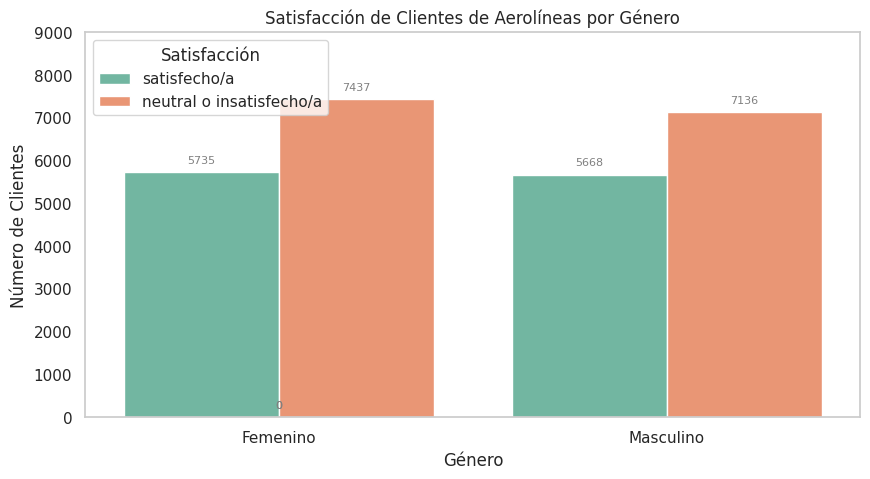

In [17]:
# Gráfico de Barras para conocer la Satisfacción de Clientas de Aerolíneas
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Género', hue='Satisfacción', palette='Set2')
plt.title('Satisfacción de Clientes de Aerolíneas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.legend(title='Satisfacción')
plt.grid(False)

# Agregar etiquetas en cada barra
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',  # convierte a entero
                (p.get_x() + p.get_width() / 2., altura),  # posición
                ha='center', va='bottom', fontsize=8, color='grey', xytext=(0, 5), textcoords='offset points')

# Ajustar la escala del eje y
plt.ylim(0, 9000)

plt.show()

El objetivo de esta visualizacion es analizar la Satisfacción de Clientes de Aerolíneas por Género pero en este caso el género NO es un factor determinante de insatisfacción.

La satisfacción del cliente con la aerolínea no varía significativamente según si es hombre o mujer. Esto sugiere que las causas de la insatisfacción son transversales y probablemente se relacionen más con: • La experiencia operativa (retrasos, cancelaciones). • La calidad del servicio (comodidad, comida, atención). • El tipo de viaje o clase de cabina.

El foco debe estar en mejorar la experiencia para todos. Dado que la proporción de insatisfechos es similar en ambos géneros, las estrategias de mejora no deben segmentarse por género, sino que deben ser generales y abordar los pain points comunes a todos los pasajeros. Para encontrar las causas reales de la insatisfacción, es crucial cruzar el género con otras variables como: tipo de viaje (Negocios vs. Personal), clase (Económica vs. Business), edad, tipo de cliente (Leal vs. Desleal) y retrasos.

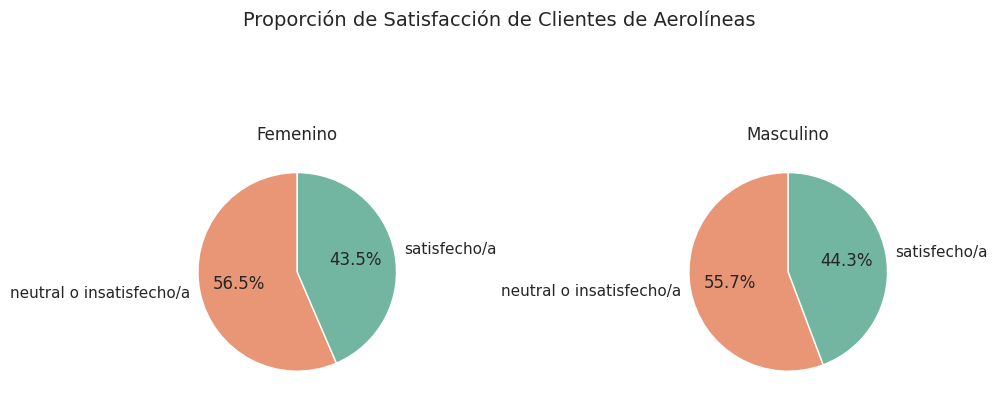

In [18]:
# Agrupamos por Género y Satisfacción
genero_satisfaccion = df.groupby(["Género", "Satisfacción"]).size().unstack()

# Creamos los gráficos de torta lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10,5))

colores = ["#e89675" , "#72b5a0"]

# Pie chart para Femenino
genero_satisfaccion.loc["Femenino"].plot(
    kind="pie", autopct="%.1f%%", ax=axes[0], colors=colores, startangle=90
)
axes[0].set_ylabel("")
axes[0].set_title("Femenino")

# Pie chart para Masculino
genero_satisfaccion.loc["Masculino"].plot(
    kind="pie", autopct="%.1f%%", ax=axes[1], colors=colores, startangle=90
)
axes[1].set_ylabel("")
axes[1].set_title("Masculino")

plt.suptitle("Proporción de Satisfacción de Clientes de Aerolíneas", fontsize=14)
plt.tight_layout()
plt.show()

Este gráfico nos muestra que más de la mitad de los clientes están insatisfechos, independientemente de su género, es decir, los problemas son sistémicos y afectan a toda la base de clientes. Contrario al gráfico anterior, aquí vemos que sí existe una diferencia por género, aunque pequeña. Las mujeres reportan niveles de insatisfacción consistentemente más altos en 0.8 puntos porcentuales. Esto podría indicar que las mujeres podrían tener expectativas más altas en ciertos servicios, ser más sensibles a factores como limpieza, seguridad o trato personal o podrían estar más expuestas a diferentes tipos de problemas operativos.

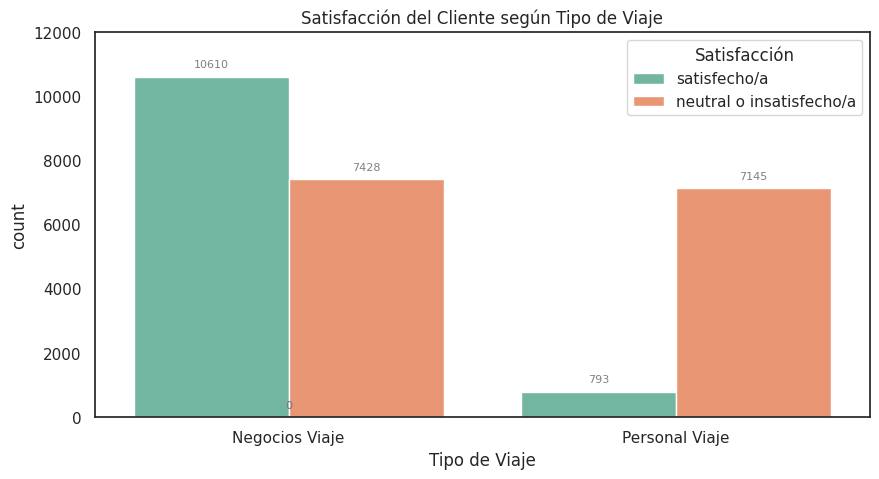

In [19]:
# Gráfico de barras sobre Satisfacción de Clientes en Aereolíneas según Tipo de Viaje
sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.title('Satisfacción del Cliente según Tipo de Viaje')
# Agregar etiquetas de datos
ax = sns.countplot(data=df, x='Tipo de Viaje', hue='Satisfacción', palette='Set2')
# Agregar etiquetas en cada barra
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',  # convierte a entero
                (p.get_x() + p.get_width() / 2., altura),  # posición
                ha='center', va='bottom', fontsize=8, color='grey', xytext=(0, 5), textcoords='offset points')
  # Ajustar la escala del eje y para que las etiquetas no se corten
plt.ylim(0, 12000)
plt.show()

Este gráfico muestra que el Tipo de Viaje es el factor crítico de Satisfacción. Hay una desigualdad masiva en la experiencia que la aerolínea ofrece: • Viajeros de Negocios: Reciben un servicio que los satisface. • Viajeros Personales: Reciben un servicio que los deja profundamente insatisfechos.

Posibles Causas de esta Brecha Abismal: • Inversión Diferenciada: La aerolínea invierte más recursos, mejores aviones y mejor personal en las rutas/clases de negocios. • Políticas Comerciales: Los viajes de negocios suelen ser en clases premium (Business/First), mientras que los personales son en Económica. • Gestión de Recursos: En caso de overbooking o problemas, se prioriza al cliente de negocios. • Expectativas: El viajero de negocios tiene expectativas diferentes (puntualidad, conectividad) vs. el personal (precio, comodidad familiar)

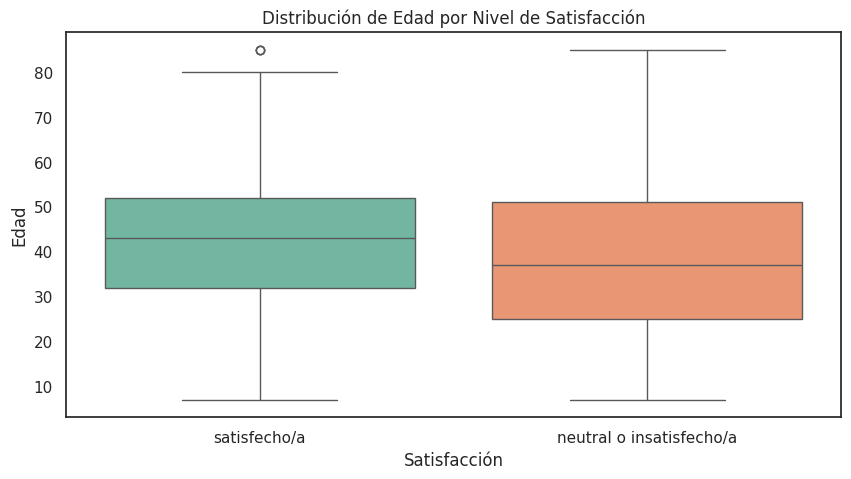

In [20]:
# Distribución de Edad por Nivel de Satisfacción

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Satisfacción", y="Edad", palette="Set2")
plt.title("Distribución de Edad por Nivel de Satisfacción")
plt.xlabel("Satisfacción")
plt.ylabel("Edad")
plt.show()

Este gráfico es un boxplot o diagrama de caja y bigotes que muestra la distribución de la edad por nivel de satisfacción. Es muy informativo para entender el perfil demográfico de los clientes satisfechos vs. insatisfechos.

Observaciones Claves:

1. Mediana Similar: o Ambas cajas (satisfechos e insatisfechos) tienen la mediana (la línea dentro de la caja) aproximadamente en la misma edad (alrededor de 40 años). o Esto indica que la edad central no varía significativamente entre los grupos.
2. Rango Intercuartílico (IQR) - La "Caja": o La caja del grupo insatisfecho es ligeramente más alta y ancha. o Esto significa que hay más variabilidad en las edades de los clientes insatisfechos. El grupo de los satisfechos es más homogéneo en edad.
3. Bigotes y Outliers (Valores Atípicos): o El bigote superior (Q3 + 1.5*IQR) del grupo insatisfecho es más largo, extendiéndose hasta cerca de los 60 años. o Esto muestra que hay una cantidad considerable de personas mayores de 50 años en el grupo de insatisfechos. o El grupo de satisfechos tiene un bigote superior más corto, con pocos outliers por encima de los 60 años.
Conclusiones Principales:

1. La Edad No es un Predictor Directo de Satisfacción La mediana similar nos dice que no existe una edad "típica" para un cliente satisfecho o insatisfecho. Un pasajero de 40 años tiene la misma probabilidad estadística de estar en uno u otro grupo.
2. Los Pasajeros de Mayor Edad Tienden a ser Más Críticos La mayor dispersión y los bigotes más largos en el grupo de insatisfechos, especialmente hacia arriba, sugieren que los pasajeros de mayor edad (50+ años) están sobrerrepresentados en el grupo de insatisfechos. Esto podría deberse a: • Mayores expectativas: Pasajeros con más experiencia de vuelo y estándares más altos. • Necesidades específicas: Mayor sensibilidad a la comodidad del asiento, espacio para las piernas, asistencia y tranquilidad. • Menor tolerancia a las molestias: Menos paciencia con los retrasos, el ruido o la falta de confort.
3. Los Pasajeros Satisfechos son un Grupo Más "Joven" y Homogéneo La caja más compacta sugiere que los clientes satisfechos se concentran en un rango de edad más estrecho (aproximadamente entre 30 y 50 años), mostrando menos variabilidad.

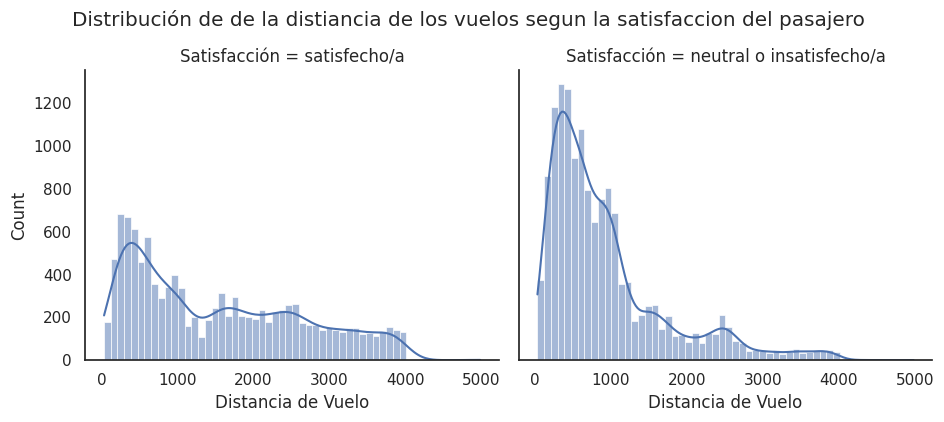

In [22]:
# Displot: Distribución de la distiancia de los vuelos segun la satisfaccion del pasajero
sns.displot(data=df, x='Distancia de Vuelo', col='Satisfacción', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de de la distiancia de los vuelos segun la satisfaccion del pasajero ', y=1.05) # Título general ajustado
plt.show()

Este gráfico muestra la distribución de las distancias de vuelo para pasajeros satisfechos vs. Insatisfechos, en el cual se puede observar que los vuelos cortos son una fuente crítica de insatisfacción. El hecho de que los insatisfechos se concentren más en el primer pico (0-1000 km) sugiere que los vuelos domésticos o regionales (cortos) tienen niveles de servicio más bajos. También podría indicar problemas como retrasos, asientos incómodos y mal servicio impactan más en vuelos cortos donde las expectativas de confort son diferentes.

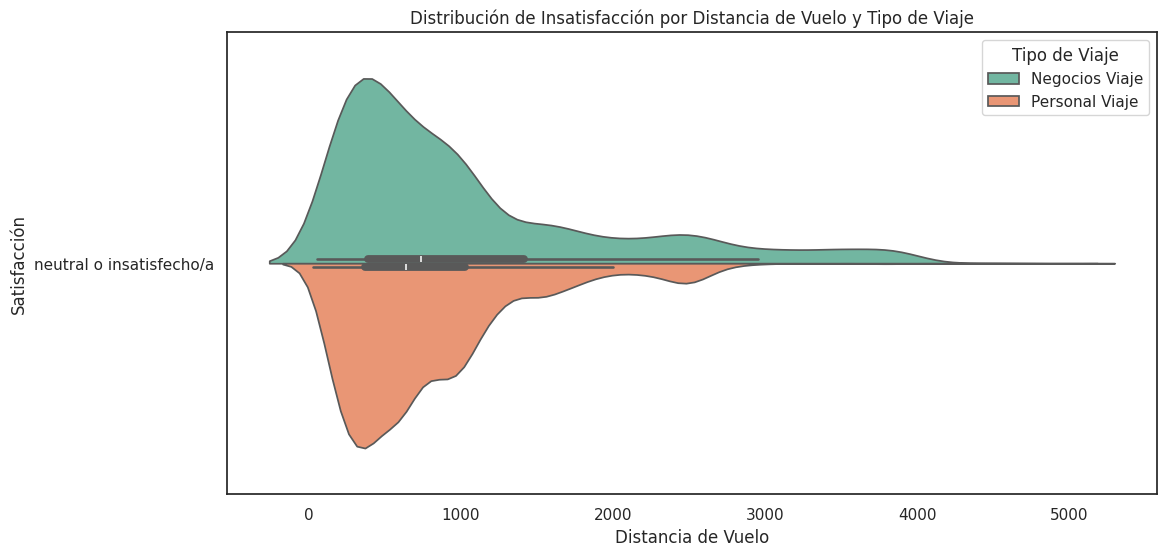

In [23]:
# Filtrar el DataFrame para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 'neutral o insatisfecho/a']

# Gráfico de violín para analizar la distribución de los insatisfechos por tipo de viaje
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_insatisfechos, x='Distancia de Vuelo', y='Satisfacción', hue='Tipo de Viaje', palette='Set2', split=True)

# Títulos y etiquetas
plt.title('Distribución de Insatisfacción por Distancia de Vuelo y Tipo de Viaje')
plt.xlabel('Distancia de Vuelo')
plt.ylabel('Satisfacción')

plt.show()

Este gráfico muestra la distribución de la insatisfacción en función de la distancia del vuelo y el tipo de viaje. Podemos ver que la mayor densidad de ambos violines está en el rango de 0-2000 km confirmando que los vuelos domésticos y regionales son la mayor fuente de problemas. Esto está alineado con el gráfico anterior. La forma más ancha y aplanada del violín para viajes personales indica que: • Hay muchos más pasajeros insatisfechos en viajes personales que en viajes de negocios para la misma distancia. • La experiencia en vuelos cortos es especialmente mala para turistas y familias. En cambio, los Viajes de Negocios Tienen Menos Variabilidad. La distribución más estrecha y concentrada para viajes de negocios sugiere que: • Este grupo experimenta problemas más consistentes (probablemente relacionados con retrasos y eficiencia). • Están menos expuestos a malas experiencias extremas en comparación con los viajeros personales. Aunque se concentra en vuelos cortos, la insatisfacción existe en todas las distancias, como lo muestran las "colas" de los violines que se extienden hasta los 5000+ km.

In [24]:
#Gráfico de promedio por motivo y satisfacción
motivos = ['Hora de salida/llegada conveniente', 'Facilidad de reserva en línea', 'Ubicación de la puerta','Comida y bebida','Embarque en línea', 'Comodidad del asiento', 'Entretenimiento a bordo', 'Servicio a bordo', 'Servicio de espacio para las piernas', 'Manejo de equipaje', 'Servicio de facturación', 'Servicio a bordo.1' , 'Limpieza' ]
#defino todos los motivos de puntuación del 1 al 5 bajo "motivos"


In [25]:
#Gráfico de promedio por motivo y satisfacción
df.melt(id_vars=['Satisfacción'], value_vars=motivos,
        var_name='motivos', value_name='Puntuacion')
# Transformo el DataFrame a formato largo: dejo 'Satisfacción' fija y convierto los motivos en filas

,Satisfacción,motivos,Puntuacion
0,satisfecho/a,Hora de salida/llegada conveniente,4
1,satisfecho/a,Hora de salida/llegada conveniente,1
2,neutral o insatisfecho/a,Hora de salida/llegada conveniente,0
3,satisfecho/a,Hora de salida/llegada conveniente,0
4,satisfecho/a,Hora de salida/llegada conveniente,3
...,...,...,...
337683,neutral o insatisfecho/a,Limpieza,4
337684,satisfecho/a,Limpieza,4
337685,neutral o insatisfecho/a,Limpieza,2
337686,satisfecho/a,Limpieza,4


In [ ]:
df['Satisfacción'] = df['Satisfacción'].map({'neutral o insatisfecho/a': 0, 'satisfecho/a': 1})

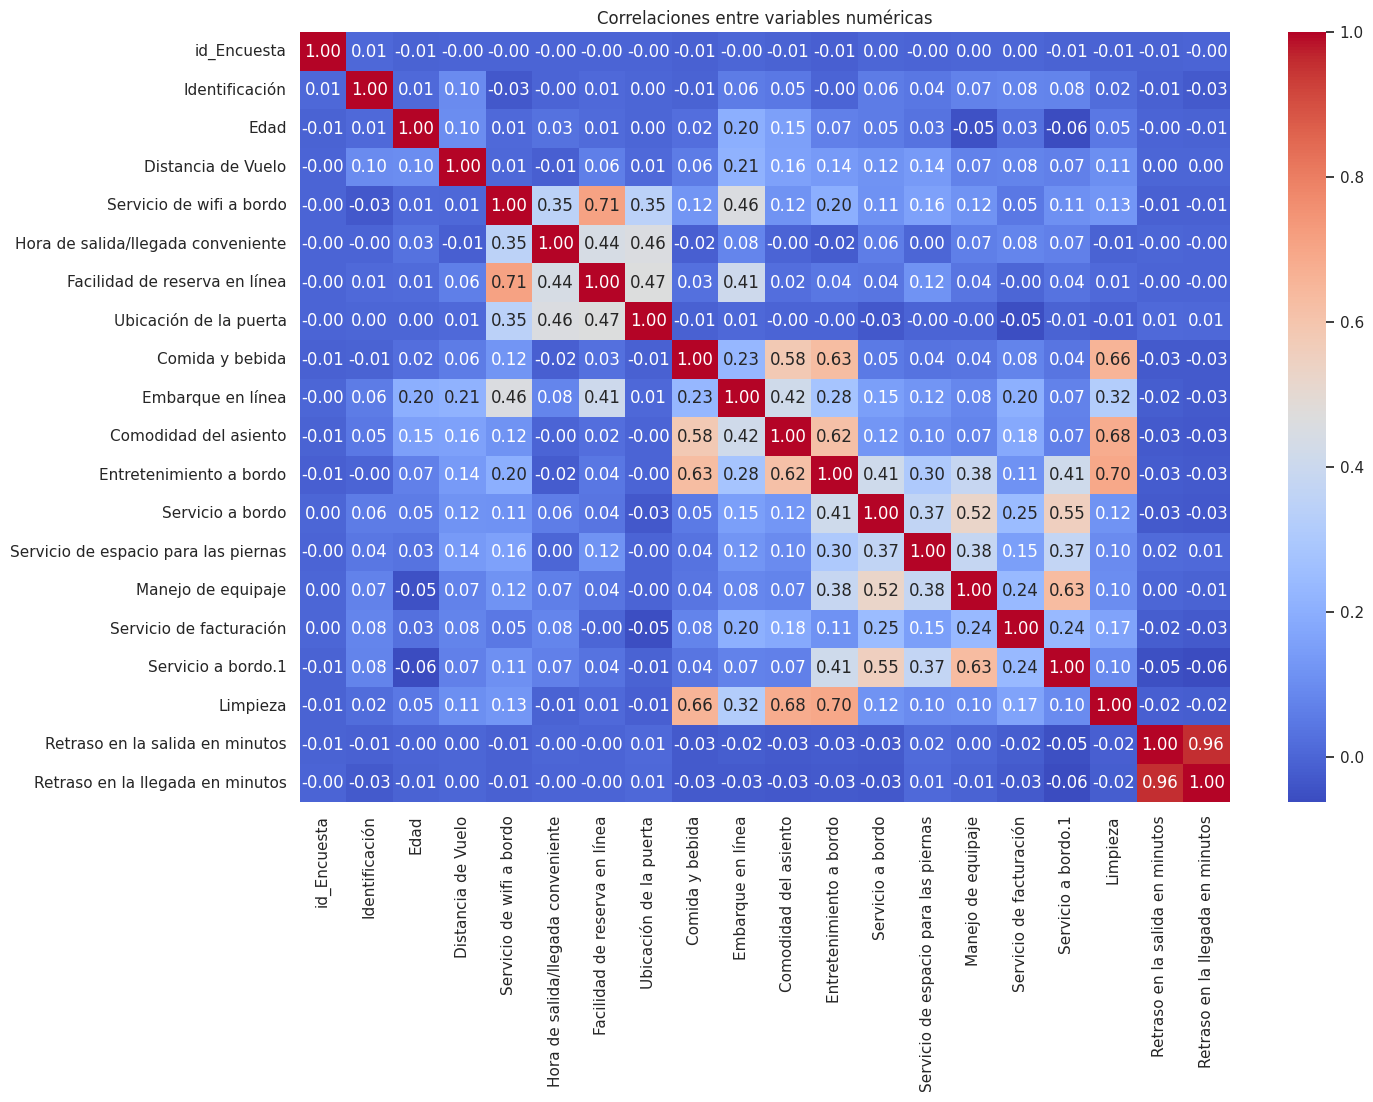

In [26]:
# Mapa de calor de correlaciones
import numpy as np
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

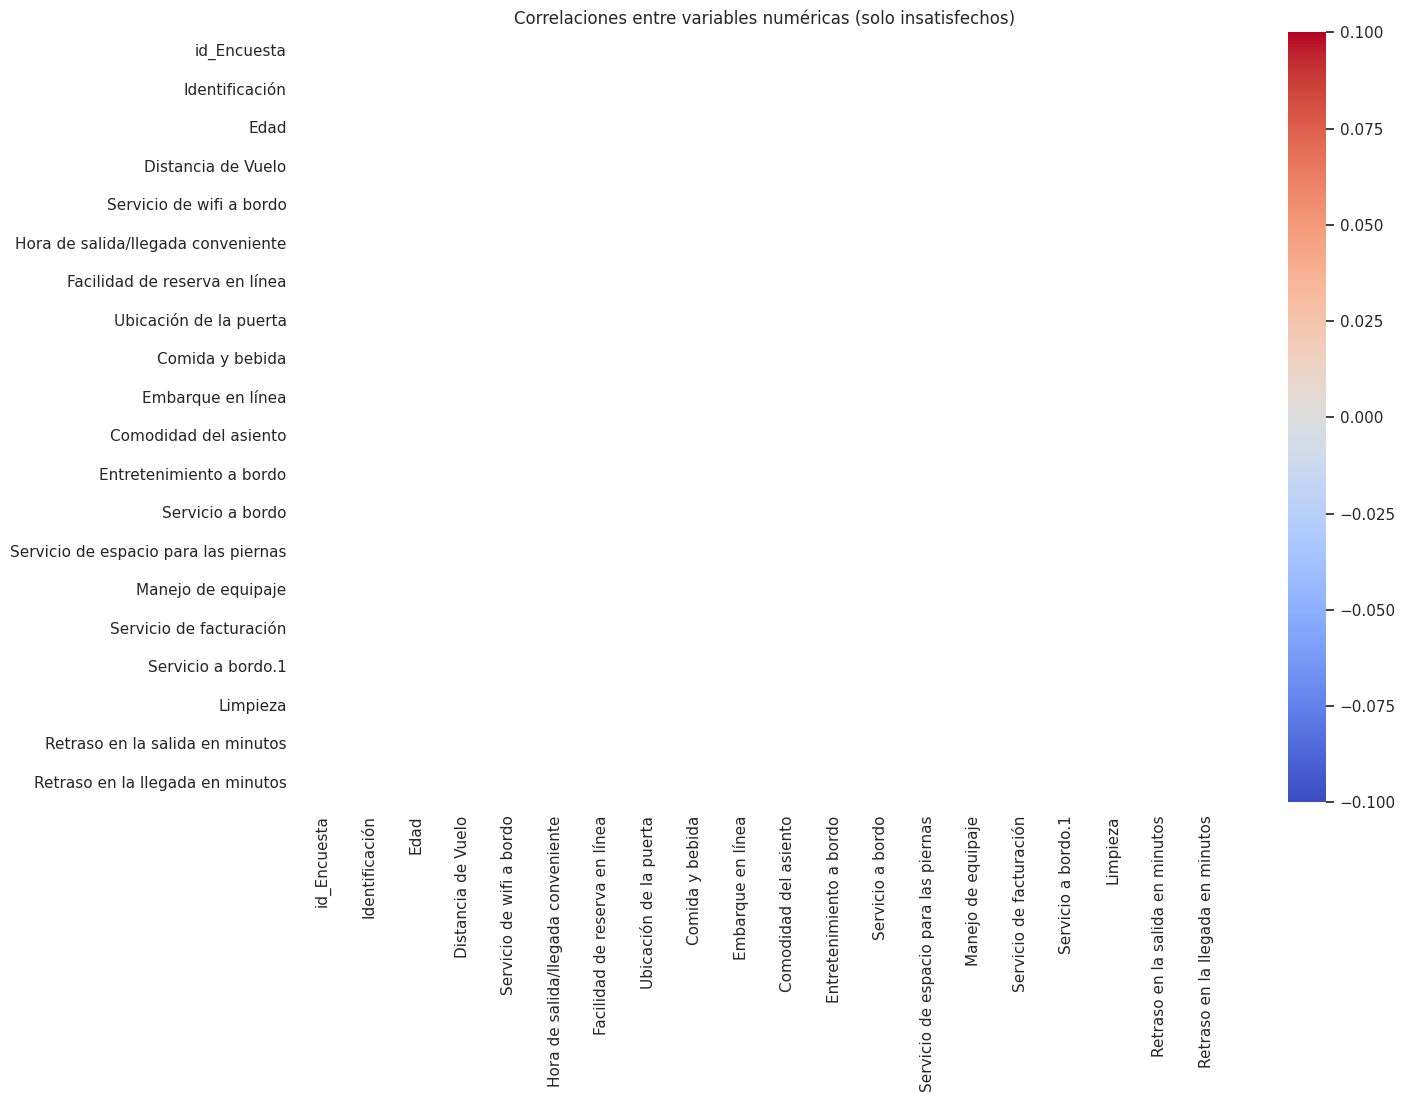

In [28]:
# Filtrar el DataFrame para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 0] # Asegúrate de que 'Satisfacción' use el valor correcto (0 para insatisfechos)

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(15, 10))
sns.heatmap(df_insatisfechos.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas (solo insatisfechos)")
plt.show()


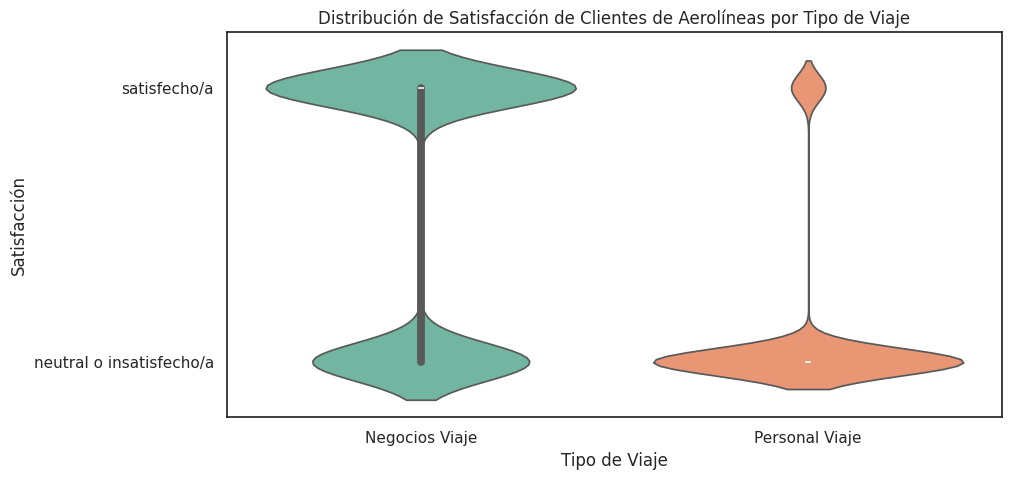

In [ ]:
# Gráfico de Violín: Este gráfico combina un boxplot con un gráfico de densidad, mostrando la distribución de satisfacción por género.
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Tipo de Viaje', y='Satisfacción', palette='Set2')

# Títulos y etiquetas
plt.title('Distribución de Satisfacción de Clientes de Aerolíneas por Tipo de Viaje')
plt.xlabel('Tipo de Viaje')
plt.ylabel('Satisfacción')
plt.show()